<a href="https://colab.research.google.com/github/RyanChen12035/w281_final_galaxy_zoo/blob/main/data_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
from google.colab import drive

# mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
def remove_duplicate(df):
  df['file_index'] = df['file_index'].str.replace('(1)', '', regex=False)
  return df

# remove_duplicate(path_generator('In between smooth'))

In [110]:
# generate data frame to save file path and index.
def path_generator(galax_type: str):
  image_dir = '/content/drive/MyDrive/galaxy_zoo/Train_images/Train_images'
  image_dir = os.path.join(image_dir, galax_type)
  image_files = os.listdir(image_dir)
  df = pd.DataFrame({'path': [os.path.join(image_dir, img) for img in image_files], 'file_index': image_files})

  return remove_duplicate(df)

# path_generator('In between smooth')

In [ ]:
# get the label
import pandas as pd

csv_file_path = '/content/drive/MyDrive/galaxy_zoo/train_label.csv'
column_names = ['index', 'class']

df = pd.read_csv(csv_file_path, names=column_names)

# create a dictionary for index and class
index_to_class = dict(zip(df['index'], df['class']))

In [42]:
# map the label to file path
def map_label(df):
  df['file_index'] = df['file_index'].str.replace('.jpg', '', regex=False).astype(int)
  df['class'] = df['file_index'].map(index_to_class)
  return df
map_label(path_generator('Cigar-shaped smooth'))

,path,file_index,class
0,/content/drive/MyDrive/galaxy_zoo/Train_images...,115384,Class0
1,/content/drive/MyDrive/galaxy_zoo/Train_images...,110411,Class0
2,/content/drive/MyDrive/galaxy_zoo/Train_images...,108959,Class0
3,/content/drive/MyDrive/galaxy_zoo/Train_images...,106018,Class0
4,/content/drive/MyDrive/galaxy_zoo/Train_images...,115109,Class0
...,...,...,...
574,/content/drive/MyDrive/galaxy_zoo/Train_images...,996707,Class0
575,/content/drive/MyDrive/galaxy_zoo/Train_images...,997804,Class0
576,/content/drive/MyDrive/galaxy_zoo/Train_images...,996192,Class0
577,/content/drive/MyDrive/galaxy_zoo/Train_images...,997901,Class0


In [45]:
# data splitting
from sklearn.model_selection import train_test_split
def data_split(df):
  # training, validation, testing: 0.8, 0.1, 0.1
  train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
  val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)
  return train_df, val_df, test_df
# data_split(map_label(path_generator('Cigar-shaped smooth')))

In [46]:
def combine_df(*dfs):
  combined_df = pd.concat(dfs, ignore_index=True)
  return combined_df

In [111]:
df_cigar = path_generator('Cigar-shaped smooth')
df_round = path_generator('completely round smooth')
df_edge_on = path_generator('edge-on')
df_in_between = path_generator('In between smooth')
df_spiral = path_generator('spiral')

df_cigar = map_label(df_cigar)
df_round = map_label(df_round)
df_edge_on = map_label(df_edge_on)
df_in_between = map_label(df_in_between)
df_spiral = map_label(df_spiral)

df_cigar_train, df_cigar_val, df_cigar_test = data_split(df_cigar)
df_round_train, df_round_val, df_round_test = data_split(df_round)
df_edge_on_train, df_edge_on_val, df_edge_on_test = data_split(df_edge_on)
df_in_between_train, df_in_between_val, df_in_between_test = data_split(df_in_between)
df_spiral_train, df_spiral_val, df_spiral_test = data_split(df_spiral)

df_train_total = combine_df(df_cigar_train, df_round_train, df_edge_on_train, df_in_between_train, df_spiral_train)
df_val_total = combine_df(df_cigar_val, df_round_val, df_edge_on_val, df_in_between_val, df_spiral_val)
df_test_total = combine_df(df_cigar_test, df_round_test, df_edge_on_test, df_in_between_test, df_spiral_test)

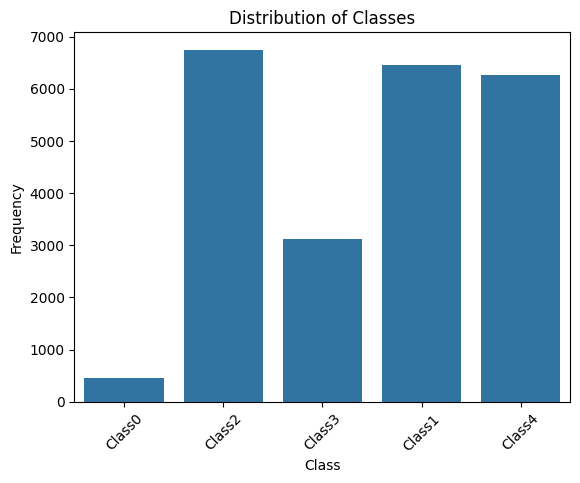

In [116]:
# df_train_total: 23057
# df_val_total: 2883
# df_test_total: 2885
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


sns.countplot(x='class', data=df_train_total)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate class labels if necessary
plt.show()

In [117]:
file_path_train = '/content/drive/MyDrive/galaxy_zoo/train_data.csv'
file_path_val = '/content/drive/MyDrive/galaxy_zoo/val_data.csv'
file_path_test = '/content/drive/MyDrive/galaxy_zoo/test_data.csv'

df_train_total.to_csv(file_path_train, index=False)
df_val_total.to_csv(file_path_val, index=False)
df_test_total.to_csv(file_path_test, index=False)